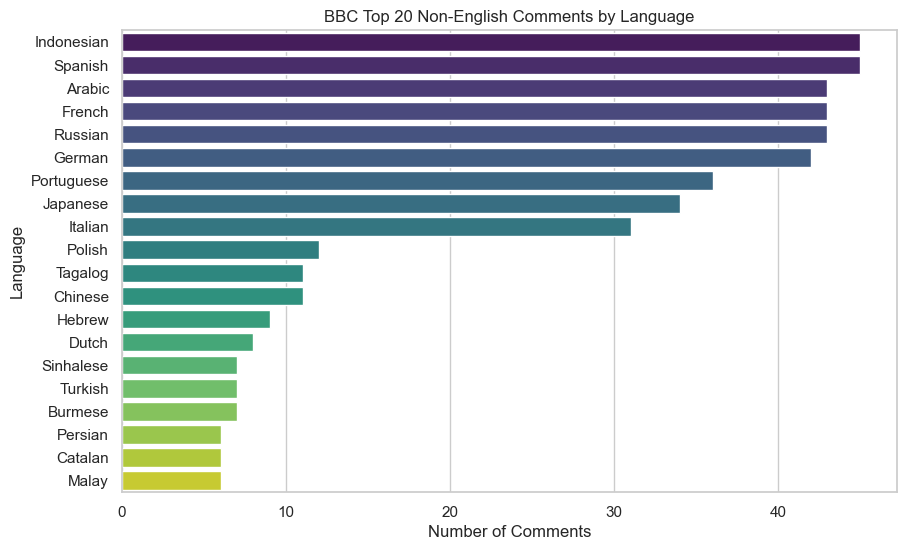

In [12]:
# BBC
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/BBC clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('BBC Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


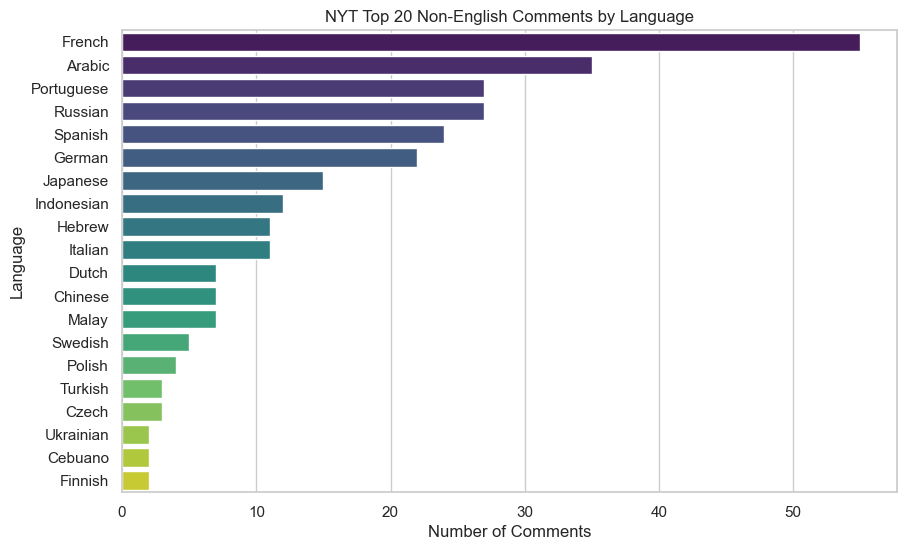

In [13]:
# NYT
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/NYT clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('NYT Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


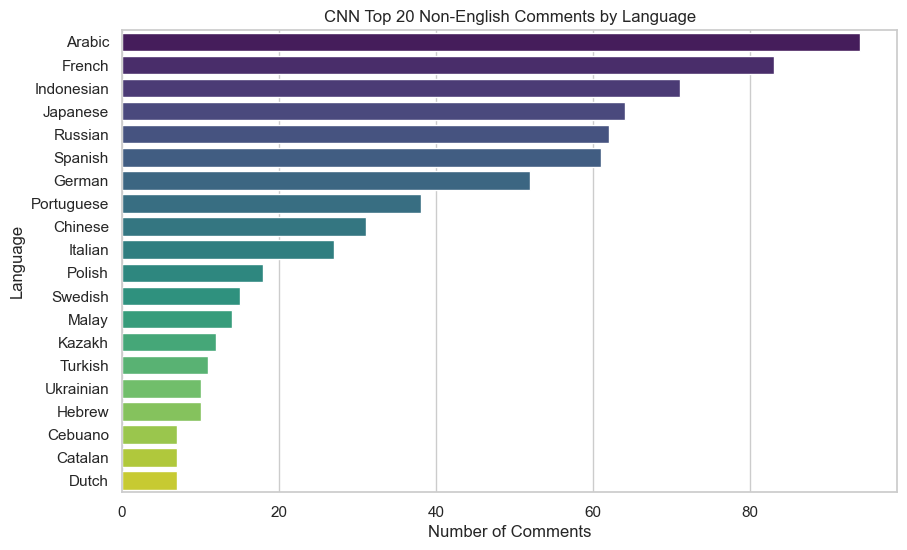

In [14]:
# CNN
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/CNN clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('CNN Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


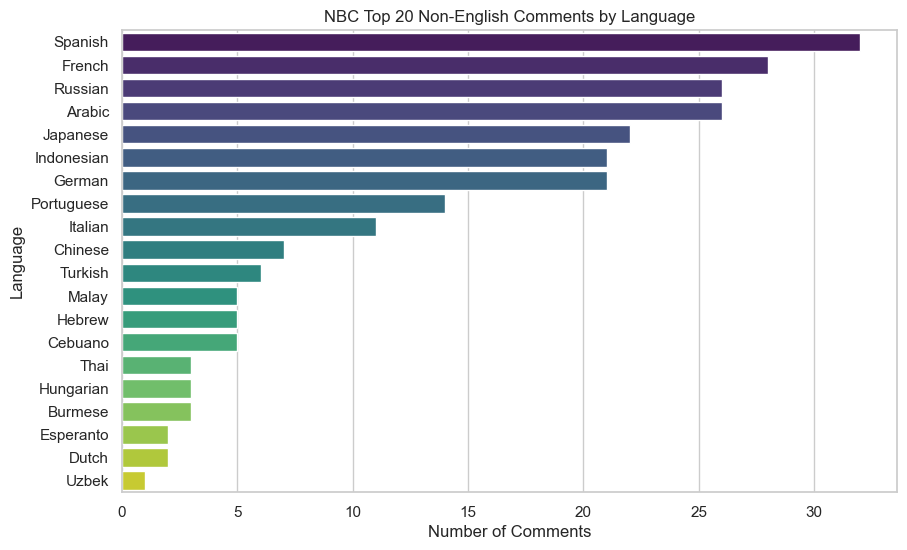

In [15]:
# NBC
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/NBC clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('NBC Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


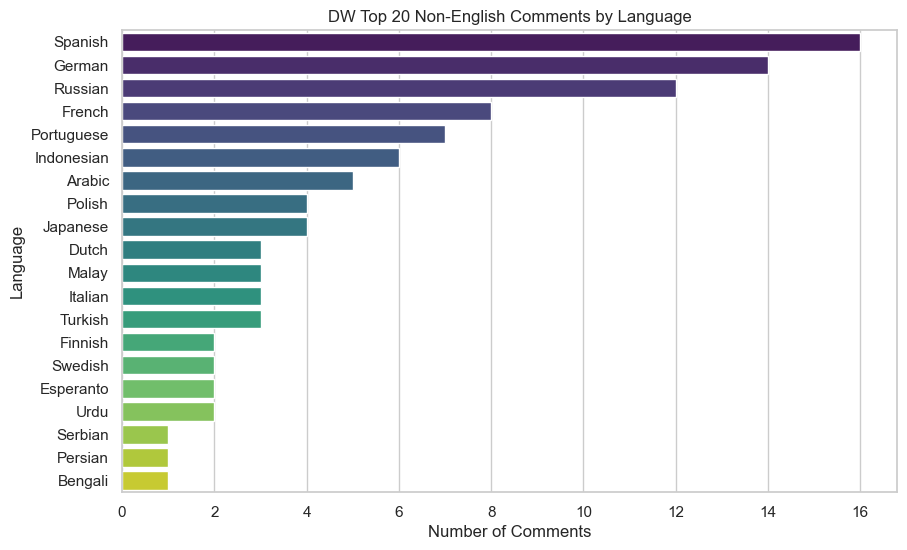

In [16]:
# DW
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/DW clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('DW Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


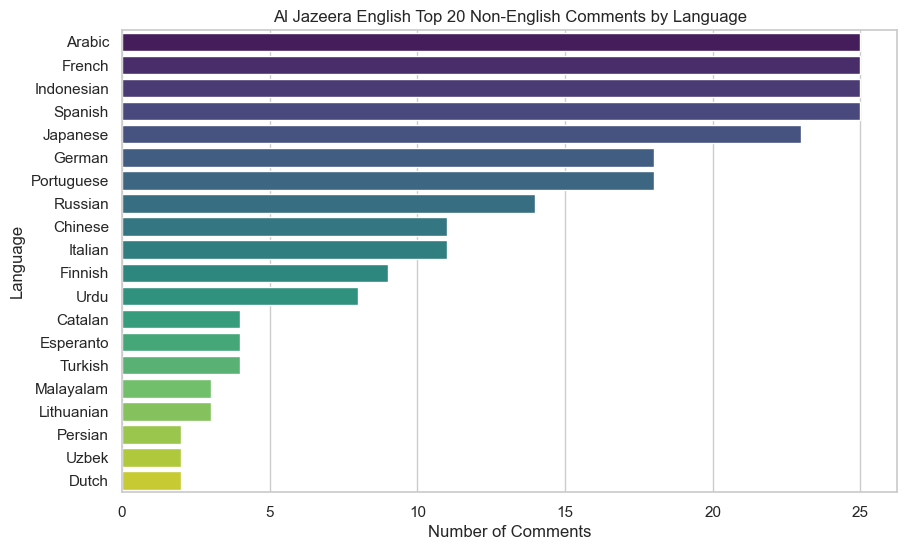

In [17]:
# AL
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/AL clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('Al Jazeera English Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


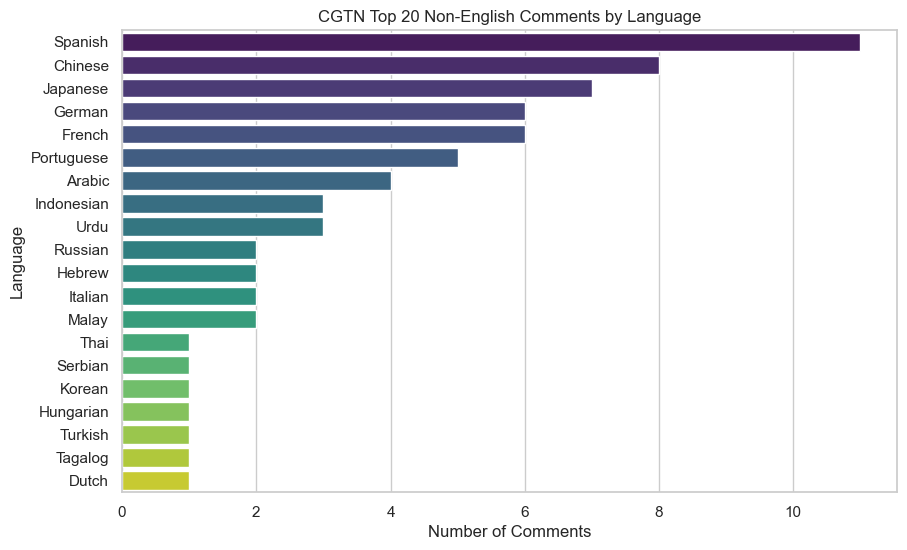

In [18]:
# CGTN
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/CGTN clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('CGTN Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()


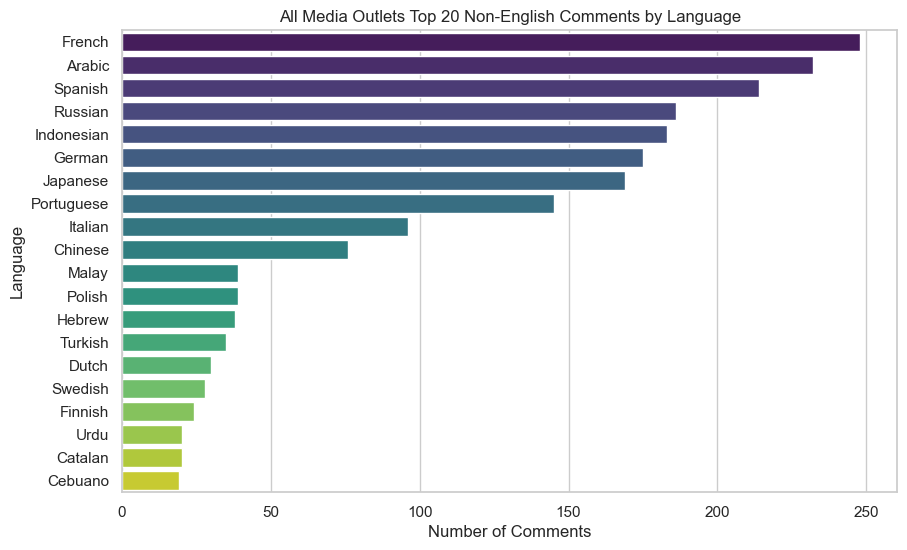

In [19]:
# ALL
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

model = fasttext.load_model('/Users/joannachoimi/Desktop/lid.176.bin')

def detect_language_fasttext(comment):
    if pd.isna(comment) or not comment.strip():
        return "unknown"
    comment = comment.replace('\n', ' ')
    predictions = model.predict(comment, k=1)
    return predictions[0][0].split('__')[-1]

file_path = '/Users/joannachoimi/Desktop/data/ALL clean.csv'
data = pd.read_csv(file_path)

data['Language'] = data['Comment'].apply(detect_language_fasttext)

filtered_data = data[(data['Language'] != 'en') & (data['Language'] != 'unknown')]

language_counts = filtered_data['Language'].value_counts()

languages_full = {
    'id': 'Indonesian', 'es': 'Spanish', 'ar': 'Arabic', 'fr': 'French', 'ru': 'Russian',
    'de': 'German', 'pt': 'Portuguese', 'ja': 'Japanese', 'it': 'Italian', 'pl': 'Polish',
    'tl': 'Tagalog', 'zh': 'Chinese', 'he': 'Hebrew', 'nl': 'Dutch', 'si': 'Sinhalese',
    'tr': 'Turkish', 'my': 'Burmese', 'fa': 'Persian', 'ca': 'Catalan', 'ms': 'Malay',
    'th': 'Thai', 'eo': 'Esperanto', 'fi': 'Finnish', 'sv': 'Swedish', 'uz': 'Uzbek',
    'ceb': 'Cebuano', 'hu': 'Hungarian', 'ml': 'Malayalam', 'hi': 'Hindi', 'ta': 'Tamil',
    'la': 'Latin', 'el': 'Greek', 'uk': 'Ukrainian', 'am': 'Amharic', 'bn': 'Bengali',
    'ro': 'Romanian', 'ur': 'Urdu', 'kn': 'Kannada', 'su': 'Sundanese', 'hr': 'Croatian',
    'ko': 'Korean', 'br': 'Breton', 'ga': 'Irish', 'io': 'Ido', 'sq': 'Albanian',
    'mr': 'Marathi', 'kk': 'Kazakh', 'cs': 'Czech', 'sh': 'Serbo-Croatian', 'mg': 'Malagasy',
    'so': 'Somali', 'sr': 'Serbian', 'min': 'Minangkabau', 'ky': 'Kyrgyz', 'lt': 'Lithuanian',
    'da': 'Danish', 'ba': 'Bashkir', 'ckb': 'Sorani Kurdish', 'km': 'Khmer'
}

language_counts_translated = {languages_full[lang]: count for lang, count in language_counts.items() if lang in languages_full}

top_languages = dict(sorted(language_counts_translated.items(), key=lambda item: item[1], reverse=True)[:20])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_languages.values()), y=list(top_languages.keys()), palette="viridis")
plt.title('All Media Outlets Top 20 Non-English Comments by Language')
plt.xlabel('Number of Comments')
plt.ylabel('Language')
plt.show()
